<a href="https://colab.research.google.com/github/ChariPuth/Collection/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning
Transfer learning is a technique where a model trained on one task is adapted for a second related task. Instead of training a model from scratch, transfer learning leverages the knowledge gained from solving one problem to solve a different, but related problem.

Useful when the amount of labeled data for the target task is limited.

###Steps involved:

>Import Libraries

>Define Constants

>Create Data Generators

>Load Pretrained InceptionV3 Model

>Freeze Convolutional Layers

>Build Custom Model Architecture

>Create a custom model using the Sequential API.

>Add the pre-trained InceptionV3 base model.

>Add a global average pooling layer to reduce spatial dimensions.

>Add one or more dense layers with ReLU activation for further feature extraction.

>Add dropout layers for regularization to reduce overfitting.

>Add the final dense layer with softmax activation for classification.

>Compile the Model

> Model Summary

>Train the Model

>Validate the model on a separate validation dataset during training.

>Evaluate and Fine-Tune

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Unzip the file
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip','r')as f:
  f.extractall('train')

In [ ]:
#Checking for items in the dataset
import pathlib

data_path = pathlib.Path('/content/train/Grapevine_Leaves_Image_Dataset')
class_names = sorted([item.name for item in data_path.glob('*')])
print(class_names)

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Nazli']


In [ ]:
#Path of each file in the dataset
ak_dir = '/content/train/Grapevine_Leaves_Image_Dataset/Ak'
dimnit_dir = '/content/train/Grapevine_Leaves_Image_Dataset/Dimnit'
nazli_dir ='/content/train/Grapevine_Leaves_Image_Dataset/Nazli'
ala_dir = '/content/train/Grapevine_Leaves_Image_Dataset/Ala_Idris'
buz_dir='/content/train/Grapevine_Leaves_Image_Dataset/Buzgulu'
data_directory = '/content/train/Grapevine_Leaves_Image_Dataset'

In [ ]:
#Check for number of images in each file
import os
ak_images = len(os.listdir(ak_dir))
dimnit_images = len(os.listdir(dimnit_dir))
ala_images = len(os.listdir(ala_dir))
nazli_images = len(os.listdir(nazli_dir))
buz_images = len(os.listdir(buz_dir))
print(f'Number of images: {ak_images}')
print(f'Number of images: {dimnit_images}')
print(f'Number of  images: {ala_images}')
print(f'Number of images: {nazli_images}')
print(f'Number of images: {buz_images}')

Number of images: 100
Number of images: 100
Number of  images: 100
Number of images: 100
Number of images: 100


###The above were basic steps to learn more about the dataset

**About the Dataset**-Grapevine Leaves Dataset:The **Grapevine Leaves Image Dataset** is a collection of images of grapevine leaves categorized into different classes such as 'Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', and 'Nazli'. The dataset was created by Murat Koklu and contains 500 images of grapevine leaves belonging to 5 species. The dataset is available on Kaggle and can be accessed via the following link:

Source:
Grapevine Leaves Image Dataset | Kaggle. https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset.


In [ ]:
#Import modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [ ]:
# Define constants
batch_size = 32
image_size = (299, 299)

In [ ]:
# Create data generators for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 400 images belonging to 5 classes.


####So 400 images are used for training.  

In [ ]:
# Display the images along with their filenames
from IPython.display import display, Image
for filename in train_generator.filenames:
    image_path = os.path.join(data_path, filename)
    display(Image(filename=image_path))

In [ ]:
#
validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 100 images belonging to 5 classes.


####So 100 images are used for validation.  

In [ ]:
#Checking inputshape
print("Input Shape:", train_generator.image_shape)
print("Number of Classes:", len(train_generator.class_indices))

Input Shape: (299, 299, 3)
Number of Classes: 5


**Implementing the InceptionV3 as my base model.**

In [ ]:
#InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Display a summary of the InceptionV3 model
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model with pre-trained weights
inception_model = InceptionV3(weights='imagenet', include_top=True)

inception_model.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_96 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activa

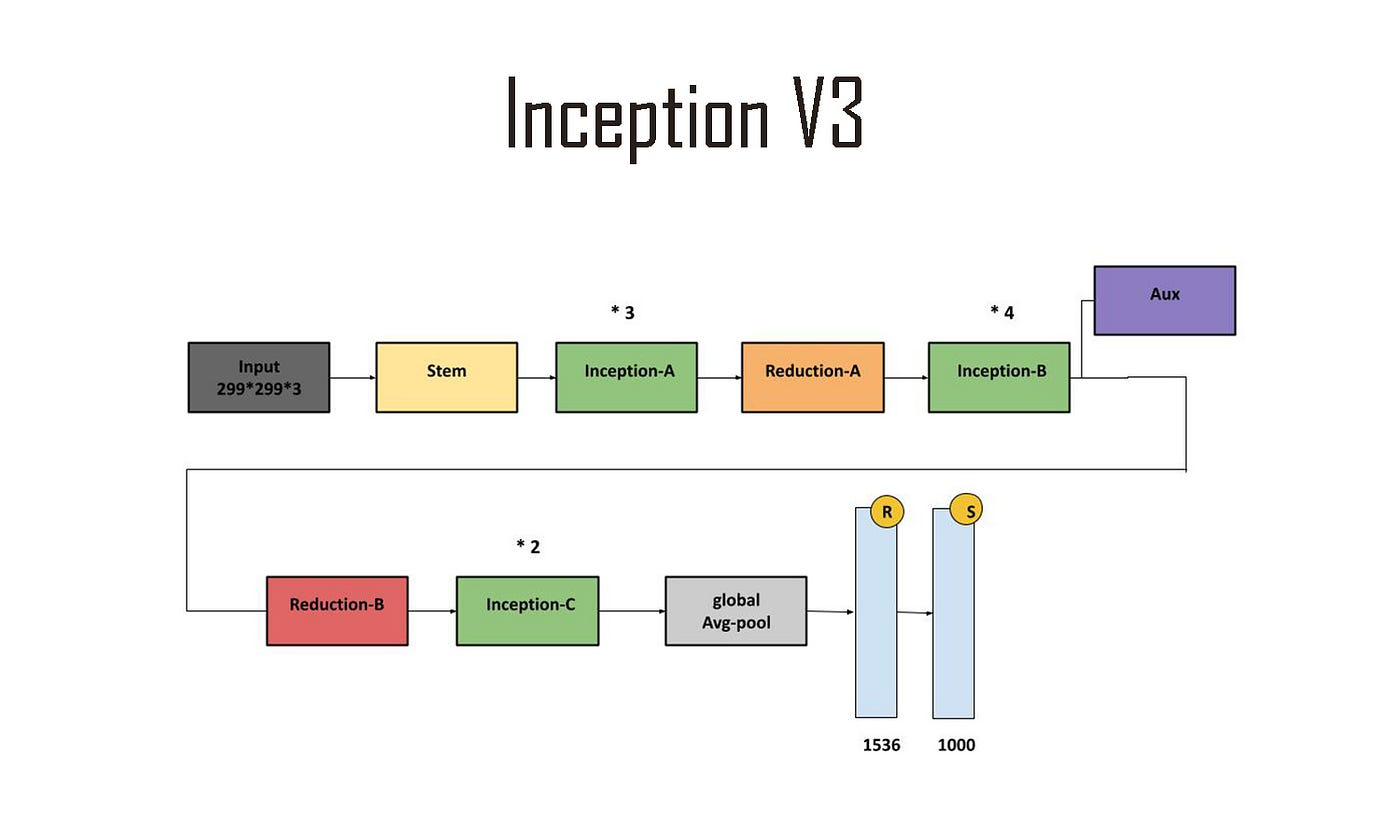

Avove is the diadram of the Inception v3 convolutional neural network architecture, which is used for image recognition and classification.

The diagram shows the different stages of the network, from the input layer to the output layer. The input layer takes an image as input, and the output layer produces a probability distribution over 1000 different categories.

The main stages of the network:
>Stem: This stage consists of a few convolutional layers that reduce the size of the input image and extract basic features.

>Inception-A: This stage is the core building block of the Inception v3 architecture. It consists of four parallel branches that extract features of different sizes and resolutions. The outputs of these branches are then concatenated together.

>Reduction-A: This stage reduces the dimensionality of the features by using pooling layers.

>Inception-B, Inception-C: These stages are similar to Inception-A, but they use different filters and have different numbers of branches.

>Global average pooling: This stage averages the features over the entire spatial dimension of the input.

>Output layer: This layer is a fully-connected layer that takes the output of the global average pooling layer and produces a probability distribution over 1000 different categories.

The Inception v3 architecture is notable for its use of parallel branches and factorized convolutions, which help to improve the accuracy of the network without increasing the number of parameters too much. This makes it a good choice for tasks where computational resources are limited.

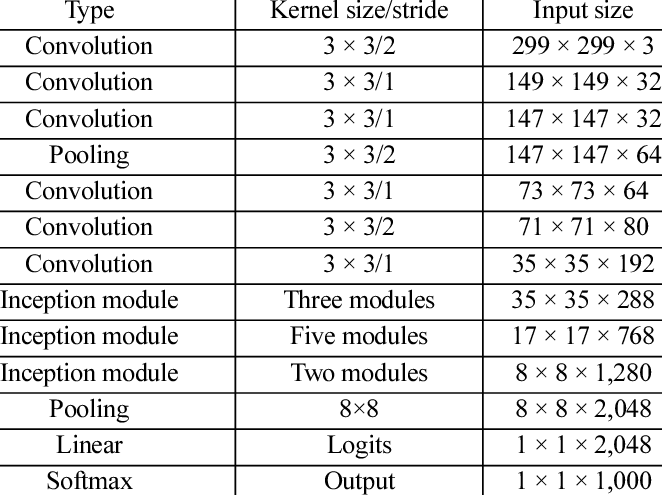

Avove table shows the sizes of patches in a convolutional neural network (CNN).

The table has three columns:
>Type: This column specifies the type of layer in the CNN. Here, we see convolution (conv), pooling (pool), linear, and softmax layers.

>Patch size/stride: This column shows the size of the patch used in the convolution or pooling operation, as well as the stride (the distance between consecutive patches). For example, the first row shows a convolution layer with a patch size of 3x3 and a stride of 2. This means that the convolution operation will be applied to 3x3 squares of the input image, moving two pixels at a time.

>Input size: This column shows the size of the input to the layer. For example, the first row shows that the input to the first convolution layer is a 299x299x3 image.

The table also includes some additional information in the rightmost column, such as "padded" for the third convolution layer, which indicates that the input was padded with zeros before the convolution operation to avoid reducing the size of the feature map.

The sizes of patches and strides are important parameters in CNNs, as they affect the resolution and receptive field of the network. The resolution is the size of the output feature map, and the receptive field is the area of the input image that each neuron in a layer is sensitive to.

Larger patch sizes and strides can reduce the resolution of the feature map, but they can also increase the receptive field and allow the network to learn more complex features. Smaller patch sizes and strides can increase the resolution of the feature map, but they can also reduce the receptive field and make it harder for the network to learn long-range dependencies.

The choice of patch size and stride depends on the specific task and the size of the input image. For example, in image classification tasks with large input images, it is common to use large patch sizes and strides in the early layers of the network to reduce the size of the feature map and make the network more computationally efficient. In later layers, where the features are more complex, it is common to use smaller patch sizes and strides to maintain a higher resolution and allow the network to learn finer details.

In [ ]:
# Create the CNN model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_95 (Ba  (None, 256)               1

Base Model: Inception V3

The base model is Inception V3, a widely used convolutional neural network (CNN) architecture designed for image classification tasks. It has been pretrained on a large dataset (likely ImageNet) to learn general features from images.
Global Average Pooling 2D Layer (GlobalAveragePooling2D)

This layer performs global average pooling on the spatial dimensions of the input, converting the 8x8 spatial dimensions of the Inception V3 output to a 1D vector with 2048 elements.
Batch Normalization Layer (BatchNormalization)

Batch normalization is applied to normalize and scale the activations of the previous layer, promoting stable and faster training.
Dense Layer (Dense)

A fully connected dense layer with 256 neurons. This layer adds capacity to the model and allows it to learn specific patterns from the features extracted by the Inception V3 base.
Dropout Layer (Dropout)

Dropout is applied to the dense layer to prevent overfitting by randomly dropping out a fraction of the neurons during training.
Batch Normalization Layer (BatchNormalization)

Another batch normalization layer is applied after the dropout layer.
Dense Layer (Dense)

The final dense layer with 5 neurons, representing the number of classes in the classification task. It uses the softmax activation function to output probabilities for each class.

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

Epoch 1/25
13/13 [==============================] - 20s 1s/step - loss: 0.3487 - accuracy: 0.8800 - val_loss: 0.7637 - val_accuracy: 0.7400
Epoch 2/25
13/13 [==============================] - 14s 1s/step - loss: 0.2991 - accuracy: 0.8925 - val_loss: 0.6557 - val_accuracy: 0.8300
Epoch 3/25
13/13 [==============================] - 14s 1s/step - loss: 0.3039 - accuracy: 0.8975 - val_loss: 0.6530 - val_accuracy: 0.8300
Epoch 4/25
13/13 [==============================] - 14s 1s/step - loss: 0.2424 - accuracy: 0.9175 - val_loss: 0.7206 - val_accuracy: 0.7300
Epoch 5/25
13/13 [==============================] - 14s 1s/step - loss: 0.2133 - accuracy: 0.9325 - val_loss: 0.6075 - val_accuracy: 0.8400
Epoch 6/25
13/13 [==============================] - 14s 1s/step - loss: 0.1757 - accuracy: 0.9350 - val_loss: 0.5955 - val_accuracy: 0.8000
Epoch 7/25
13/13 [==============================] - 12s 900ms/step - loss: 0.1861 - accuracy: 0.9350 - val_loss: 0.5806 - val_accuracy: 0.8300
Epoch 8/25
13/13 

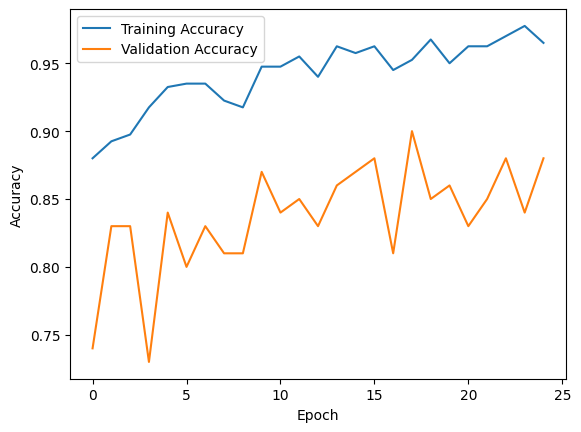

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()